## 字元切割
使用 OpenCV 切割出各個字母

In [1054]:
import cv2
import matplotlib.pyplot as plt
import requests
import urllib3
from PIL import Image
import io
import numpy as np

%matplotlib inline
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

captcha_url = 'https://webap.nkust.edu.tw/nkust/validateCode.jsp'

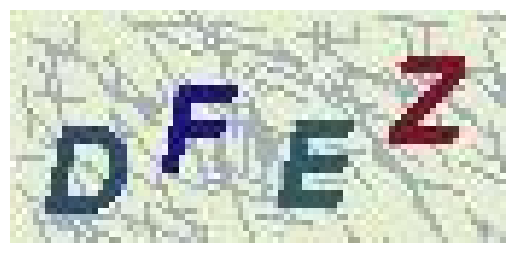

In [1055]:
# 爬取驗證圖片
response = requests.get(captcha_url, verify=False)
img = np.array(Image.open(io.BytesIO(response.content)))

plt.axis('off')
plt.imshow(img)

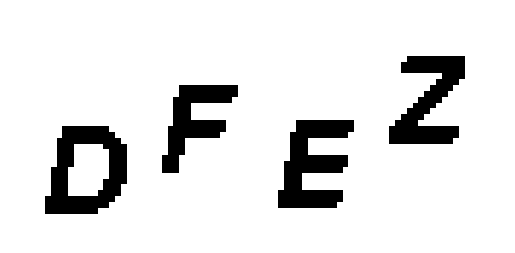

In [1056]:
# 使用openCV將圖片二值化
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_gray = cv2.threshold(img_gray, 132, 255, cv2.THRESH_BINARY)

# 去除躁點
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
img_final = cv2.erode(img_gray, kernel)

plt.axis('off')
plt.imshow(img_final, cmap='gray')

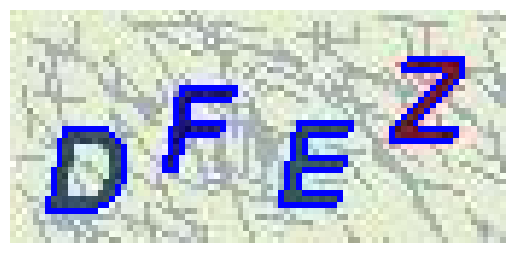

In [1057]:
img_final = cv2.bitwise_not(img_final)  # findContours的黑色是背景, 所以需反向
contours, hierarchy = cv2.findContours(img_final, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (0,0,255))

plt.axis('off')
plt.imshow(img_copy, cmap='gray')

(6, 20, 14, 15)
(46, 19, 13, 15)
(26, 13, 13, 15)
(65, 8, 13, 15)


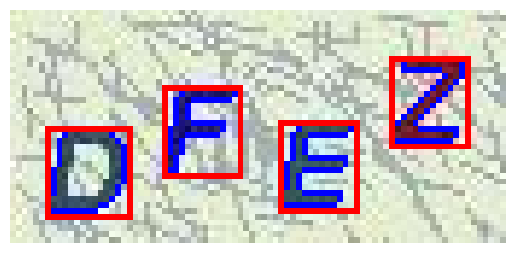

In [1058]:
results = [] # 切割後的結果

for item in contours:
    rect = cv2.boundingRect(item)
    x, y, w, h = rect
    results.append([x, img_final[y:y+h, x:x+w]])

    print(rect)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(255,0,0))

plt.axis('off')
plt.imshow(img_copy)

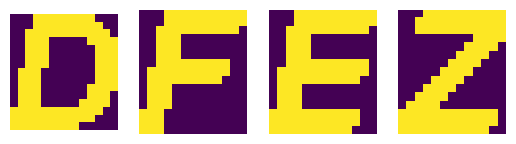

In [1059]:
results = sorted(results, key=lambda x: x[0])  # 重新排序
# size = max([x[1].shape for x in results])    # 取得最大的圖片大小

input_img = [0]*4

for i, item in enumerate(results):
    # Image.fromarray(item[1]).save(f"./images/tmp/0tmp_{i}.bmp")  # 圖片存檔
    input_img[i] = item[1]

    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(item[1])

## 字元辨識
將圖片大小補至30×30，並靠右上對齊。
接著用歐式距離來計算相似度。

In [1060]:
import glob

In [1061]:
datas_path = glob.glob("./images/bmp/*.bmp")
data = [cv2.imread(x)[:,:,0] for x in datas_path]

In [1062]:
key = "123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
ans = ''

for a in input_img:
    score = [0]* (9 + 26) # 0~9 + A~Z（因為 O 與 0 容易搞混，所以沒有 0）
    for i, b in enumerate(data):
        a = cv2.copyMakeBorder(a, 0, 30-a.shape[0], 0, 30-a.shape[1], cv2.BORDER_CONSTANT, 0)
        b = cv2.copyMakeBorder(b, 0, 30-b.shape[0], 0, 30-b.shape[1], cv2.BORDER_CONSTANT, 0)
        score[i] = sum(np.sqrt(sum(pow(a - b,2))))

        print(*zip(key,score), sep='\n')
        print("="*20)

    ans += key[np.argmin(score)]

('1', 37.888671875)
('2', 0)
('3', 0)
('4', 0)
('5', 0)
('6', 0)
('7', 0)
('8', 0)
('9', 0)
('A', 0)
('B', 0)
('C', 0)
('D', 0)
('E', 0)
('F', 0)
('G', 0)
('H', 0)
('I', 0)
('J', 0)
('K', 0)
('L', 0)
('M', 0)
('N', 0)
('O', 0)
('P', 0)
('Q', 0)
('R', 0)
('S', 0)
('T', 0)
('U', 0)
('V', 0)
('W', 0)
('X', 0)
('Y', 0)
('Z', 0)
('1', 37.888671875)
('2', 35.96875)
('3', 0)
('4', 0)
('5', 0)
('6', 0)
('7', 0)
('8', 0)
('9', 0)
('A', 0)
('B', 0)
('C', 0)
('D', 0)
('E', 0)
('F', 0)
('G', 0)
('H', 0)
('I', 0)
('J', 0)
('K', 0)
('L', 0)
('M', 0)
('N', 0)
('O', 0)
('P', 0)
('Q', 0)
('R', 0)
('S', 0)
('T', 0)
('U', 0)
('V', 0)
('W', 0)
('X', 0)
('Y', 0)
('Z', 0)
('1', 37.888671875)
('2', 35.96875)
('3', 39.3046875)
('4', 0)
('5', 0)
('6', 0)
('7', 0)
('8', 0)
('9', 0)
('A', 0)
('B', 0)
('C', 0)
('D', 0)
('E', 0)
('F', 0)
('G', 0)
('H', 0)
('I', 0)
('J', 0)
('K', 0)
('L', 0)
('M', 0)
('N', 0)
('O', 0)
('P', 0)
('Q', 0)
('R', 0)
('S', 0)
('T', 0)
('U', 0)
('V', 0)
('W', 0)
('X', 0)
('Y', 0)
('Z', 0)

Answer: DFEZ


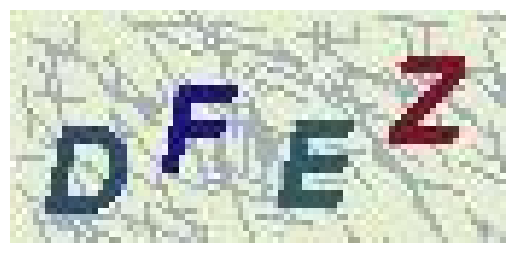

In [1063]:
print("Answer:", ans)
plt.axis('off')
plt.imshow(img)